# Data Processing
+ 17 features, 8950 samples

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.style as ms
ms.use('classic')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [19]:
# 读取数据
data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [21]:
# 去除有缺失的值
data[data.isnull().values==True]
data=data.dropna(how='any')
data[data.isnull().values==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [22]:
# 去除重复值
data[data.duplicated().values==True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [23]:
# 数据描述
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [24]:
# 去除多余的列
data=data.drop(["CUST_ID","PURCHASES","PURCHASES_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX"],axis=1) # 0是每一列中的每一行进行操作，1是每一行的每一列进行操作

In [25]:
# 标准化有数量级的列
from sklearn.preprocessing import StandardScaler#标准化，返回值为标准化后的数据
from sklearn.preprocessing import Normalizer
pre_values=data.loc[:,["BALANCE",'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']]

# std_scl = StandardScaler()
# std_values=std_scl.fit_transform(pre_values)
# std_values.shape

nm_scl=Normalizer()
nm_values=nm_scl.fit_transform(pre_values)


data.loc[:,["BALANCE",'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']]=nm_values
data

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039523,0.818182,0.000000,0.092185,0.000000,0.000000,0.083333,0.000000,0.966303,0.195002,0.134809,0.000000,12
1,0.293876,0.909091,0.000000,0.000000,0.591240,0.000000,0.000000,0.250000,0.642358,0.376517,0.098404,0.222222,12
2,0.312250,1.000000,0.096757,0.000000,0.000000,1.000000,0.000000,0.000000,0.938571,0.077847,0.078500,0.000000,12
4,0.504323,1.000000,0.009868,0.000000,0.000000,0.083333,0.000000,0.000000,0.740096,0.418361,0.150974,0.000000,12
5,0.451778,1.000000,0.000000,0.332820,0.000000,0.000000,0.583333,0.000000,0.449325,0.349489,0.600909,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,0.011610,0.500000,0.041323,0.000000,0.000000,0.166667,0.000000,0.000000,0.988597,0.115952,0.085956,0.000000,6
8945,0.026077,1.000000,0.000000,0.266426,0.000000,0.000000,0.833333,0.000000,0.915175,0.297976,0.044740,0.500000,6
8947,0.023002,0.833333,0.000000,0.141951,0.000000,0.000000,0.666667,0.000000,0.983043,0.079893,0.081021,0.250000,6
8948,0.026526,0.833333,0.000000,0.000000,0.072061,0.000000,0.000000,0.166667,0.985544,0.103581,0.109899,0.250000,6


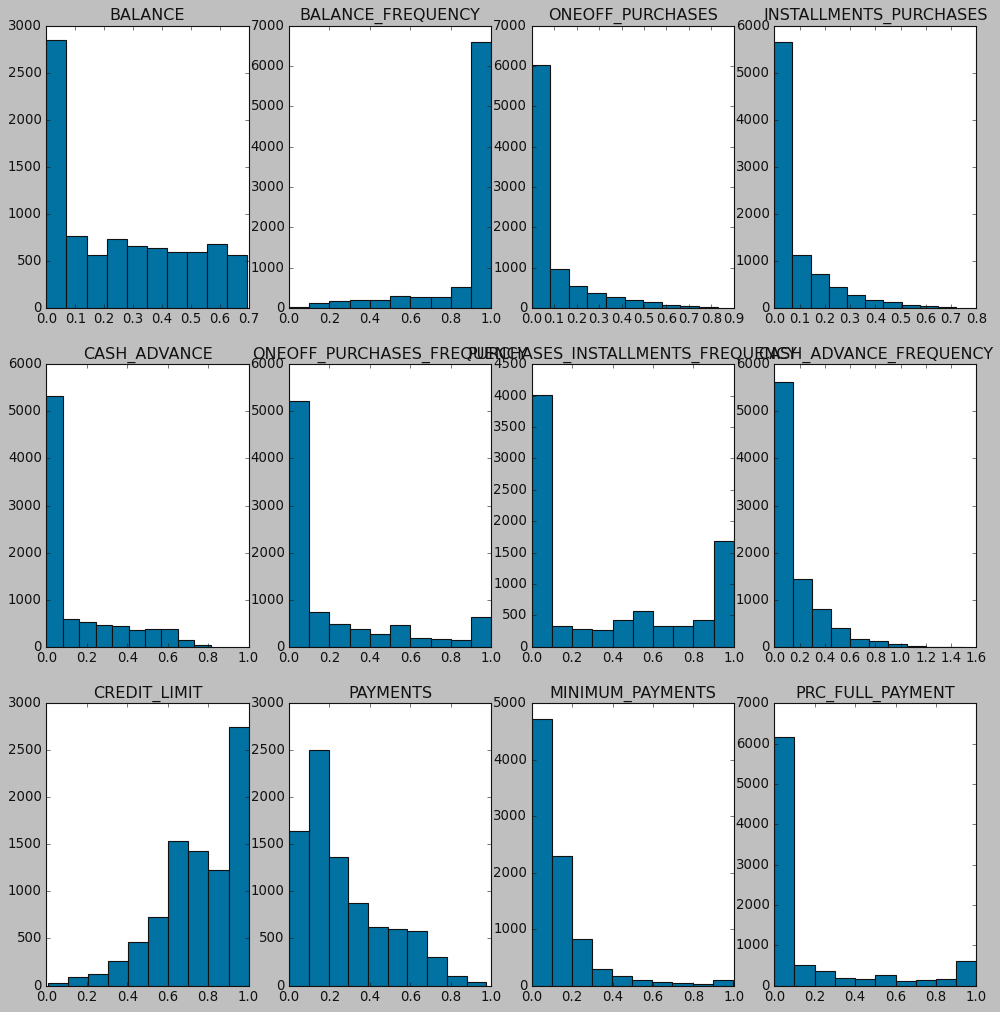

In [26]:
# 可视化
fig,axs=plt.subplots(3,4,figsize=(15,15))

count=0

for i in range(3):
    for j in range(4):
        axs[i][j].set_title(data.columns[count])
        axs[i][j].hist(data.iloc[:,count])
        count+=1
       

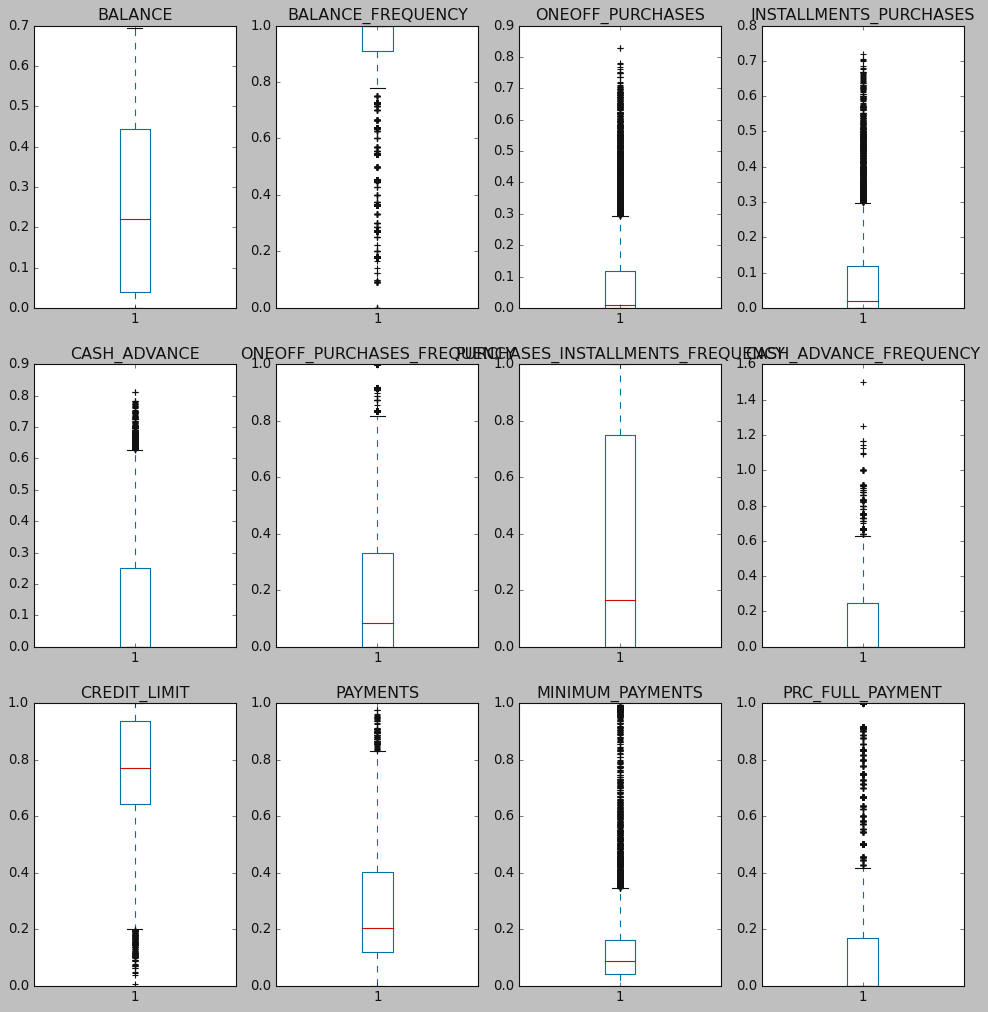

In [27]:
# 箱线图
fig,axs=plt.subplots(3,4,figsize=(15,15))

# for i in range(1,9):
#     plt.hist(data.iloc[:,i])

count=0

for i in range(3):
    for j in range(4):
        axs[i][j].set_title(data.columns[count])
        axs[i][j].boxplot(data.iloc[:,count])
        count+=1

# K-means

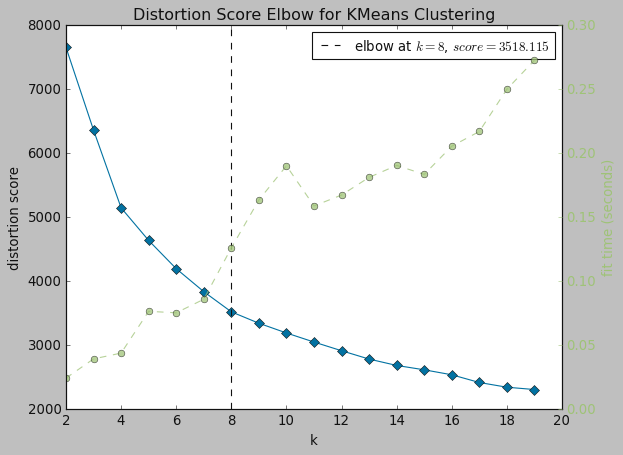

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# K-means选出分为7个类，一般用K-means
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20),dpi=200)
visualizer.fit(data)
visualizer.show()


# Plotting function

In [102]:
def red_dim_plot2(red_model,data):
    """降维成二维然后作图"""
    trans_data=red_model.fit_transform(data)
    fig,ax=plt.subplots()
    fig.set_facecolor('w')
    ax.scatter(trans_data[:,0],trans_data[:,1],alpha=0.5)
    return trans_data
    
def dbscan_clst_plot2(eps,min_samples,trans_data):
    """降维后的图基于密度进行聚类，再作图"""
    dbscan_model=DBSCAN(eps=eps,min_samples=min_samples,n_jobs=-1)
    labels=dbscan_model.fit_predict(trans_data)
    fig1,ax1=plt.subplots()
    fig1.set_facecolor('w')
    ax1.scatter(trans_data[:,0],trans_data[:,1],c=labels,alpha=0.5)
    return dbscan_model
    

def red_dim_plot3(model,data,labels):
    """降维后,利用DBSCAN进行聚类,画一个降成三维的图"""
    trans_data=model.fit_transform(data)
    ax = plt.axes(projection='3d')
    fig=plt.figure()
    ax.scatter3D(trans_data[:,0],trans_data[:,1],trans_data[:,2],c=labels)
    fig.set_facecolor('w')

# K-means
k_means_model=KMeans(n_clusters=7)
pred_y=k_means_model.fit_predict(data)

# PCA

0.8148922214294886

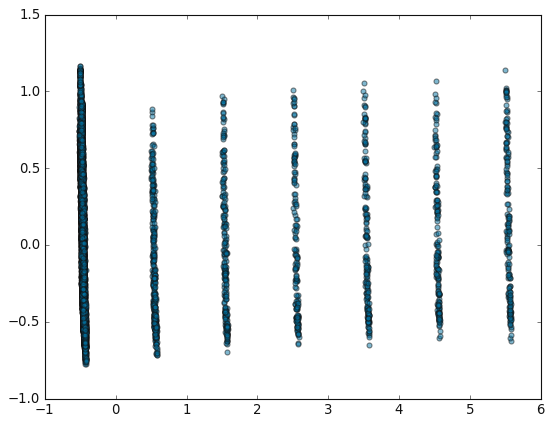

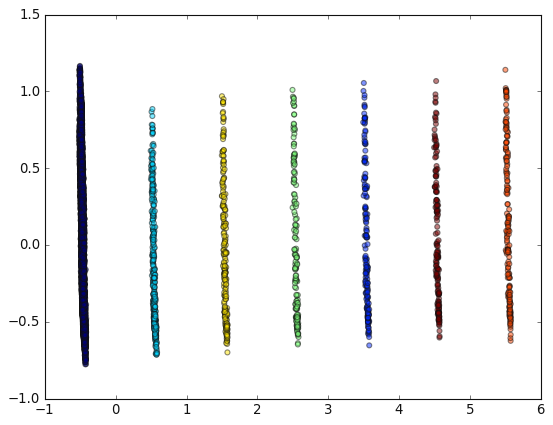

In [103]:

pca2=PCA(n_components=2)

ms.use(['classic'])

trans_data=red_dim_plot2(pca2,data)

model=dbscan_clst_plot2(eps=0.5,min_samples=30,trans_data=trans_data)

# 展示特征值占比
np.sum(pca2.explained_variance_ratio_)

# T-SNE

d:\vscode\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\vscode\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


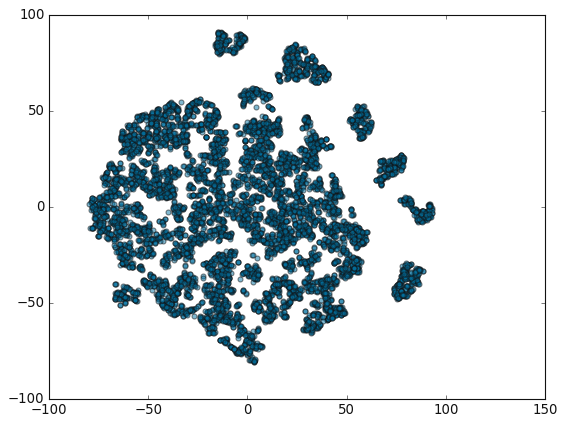

In [95]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2)  # 降维度至二维

t_trans_data=red_dim_plot2(tsne2,data)

{0, 1, 2, 3, 4, 5, 6}

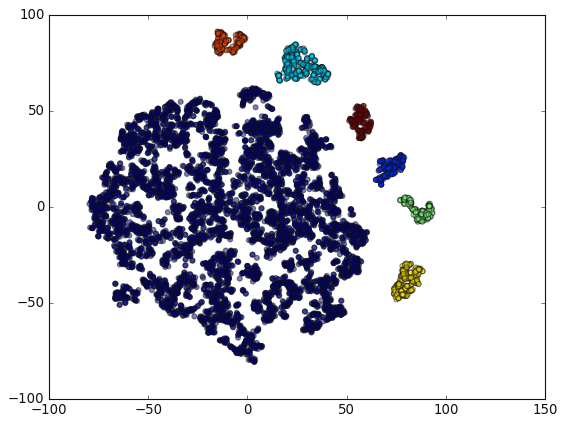

In [107]:
model=dbscan_clst_plot2(eps=9,min_samples=30,trans_data=t_trans_data)
set(model.labels_)

# Spectral Embedding

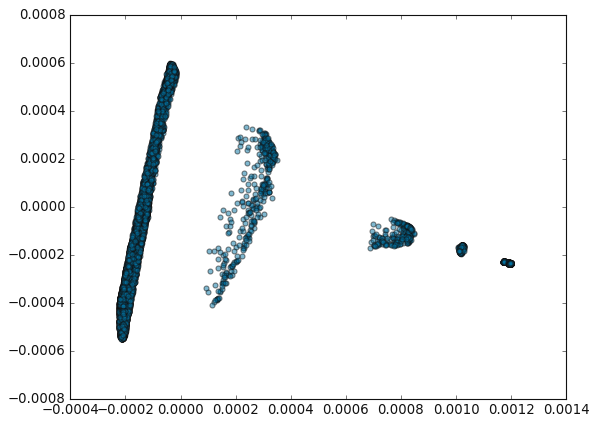

In [109]:
from sklearn.manifold import SpectralEmbedding

SE=SpectralEmbedding(n_components=2)

se_transdata=red_dim_plot2(SE,data)


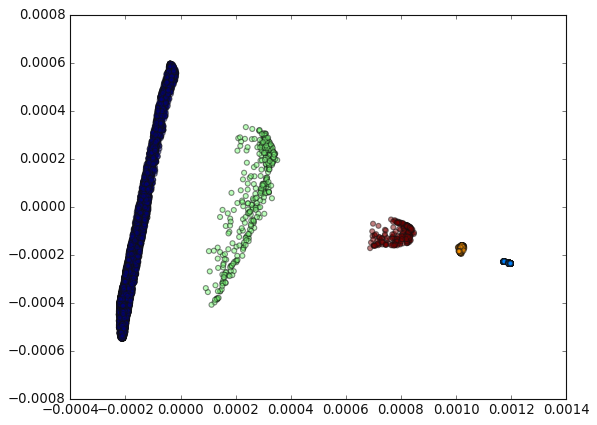

In [112]:
model=dbscan_clst_plot2(eps=0.0001,min_samples=1,trans_data=se_transdata)

# Isomap

d:\vscode\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 7 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\vscode\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing t

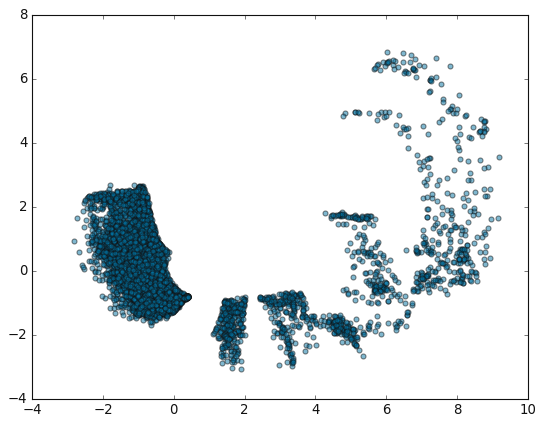

In [114]:
from sklearn.manifold import Isomap

iso2=Isomap(n_components=2)
iso_transdata=red_dim_plot2(iso2,data)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

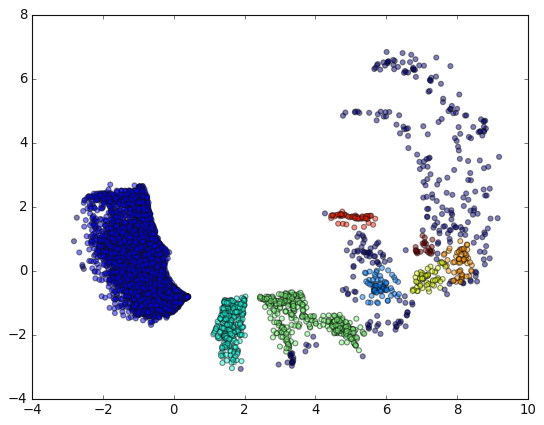

In [133]:
model=dbscan_clst_plot2(eps=0.35,min_samples=25,trans_data=iso_transdata)
set(model.labels_)

#